# Load Tweets

In [1]:
import pandas as pd
df = pd.read_csv("label_tweets_v2.csv")
df=df.rename(columns={"Unnamed: 0":"index"})

In [2]:
# locad the data 
df.head()

,index,score,label,text,date,username,hashtags
0,0,-0.0258,0.0,yes you can get burnout stress migraines even ...,4/29/2020 23:59,maria_emlano,#WFH
1,1,0.0000,NaN,it s am so i should probably change from my pj...,4/29/2020 23:59,DrHelen_Mac,#IsolationLife #WFH
2,2,0.1779,1.0,icymi an rsa customer and discuss how the incr...,4/29/2020 23:59,RSAsecurity,#ICYMI #WFH #security #DynamicWorkforceRisk
3,3,0.5719,1.0,my shift has ended hurray for the long weekend...,4/29/2020 23:59,iam_aikenlei,#wfh #longweekend #ecqpic
4,4,0.9349,1.0,who can share the best hr policy for wfh in my...,4/29/2020 23:59,subh10,#WFH


# We will process the five parts

### 1.Text Analytics and NLP

### 2.Compare Text Analytics, NLP and Text Mining
 - Text Analysis Operations using NLTK
 - Tokenization
 - Stopwords
 - Lexicon Normalization such as Stemming and Lemmatization
 - POS Tagging

### 3.Sentiment Analysis

### 4.Text Classification

### 5.Performing Sentiment Analysis using Text Classification


In [3]:
#Loading NLTK
import nltk
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')

sentence tokenization

In [4]:
text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.The sky is pinkish-blue. You shouldn't eat cardboard"


In [5]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.The sky is pinkish-blue.', "You shouldn't eat cardboard"]


work tokenization

In [6]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


Frequency Distribution

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 28 outcomes>


In [8]:
fdist.most_common(2)

[('is', 3), (',', 2)]

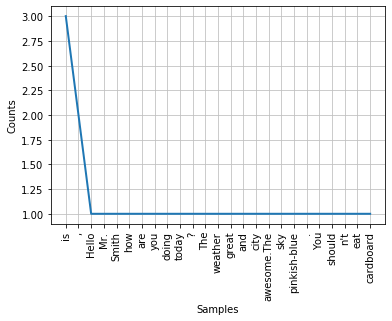

In [9]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
%matplotlib inline
fdist.plot(30,cumulative=False)
plt.show()

Stopwords

In [10]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'am', 'yourself', 'too', 'where', 'is', 'been', "won't", 'once', 'same', 'doesn', 'but', 'theirs', 'own', 'himself', 'she', 'other', 'at', 'o', "wouldn't", 'him', 'our', "you'd", 'her', 'out', 've', "it's", 'why', 'some', "needn't", 'off', 'yours', 'there', 'with', "hadn't", 'who', "weren't", 't', 'd', "don't", 'does', 'up', 'ain', 'and', 'before', 'hadn', 'hasn', 'nor', 'mustn', 'or', 'of', 're', 'that', 'couldn', 'shouldn', 'didn', 'did', 'what', 'being', "aren't", 'will', 'so', "mightn't", 'won', 'itself', 'my', 'again', "that'll", 'below', 'any', 'these', 'his', 'by', 'are', 'if', 'as', 'between', 'll', 'your', 'be', 'haven', 'm', 'into', 'wouldn', 'doing', 'very', "you'll", 'most', 'their', 'after', 'i', 'he', 'over', 'about', 'just', 'an', 'to', 'you', "she's", 'from', 'during', "hasn't", 'wasn', 'its', 'few', 'they', 'until', 'yourselves', 'isn', 'those', 'above', 'were', 'than', 'should', "you're", "shan't", "isn't", "haven't", 'mightn', 'down', 'while', 'has', "couldn't", 'su

In [11]:
#removing stopwords
tokenized_sent = tokenized_word

filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)


print("Tokenized Sentence:",tokenized_sent)
print("----")
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
----
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


Stemming

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Sentence:",filtered_sent)

print("----")

print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
----
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesome.th', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


Lemmatization

In [13]:
#Lexicon Normalization
#performing stemming and Lemmatization
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


### Text Classification

![](https://tva1.sinaimg.cn/large/007S8ZIlgy1gff1cvpokrj30uw0gc0wb.jpg)

In [14]:
# Import pandas
import pandas as pd
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115000 entries, 0 to 114999
Data columns (total 7 columns):
index       115000 non-null int64
score       115000 non-null float64
label       79355 non-null float64
text        115000 non-null object
date        115000 non-null object
username    115000 non-null object
hashtags    115000 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


In [15]:
df.head()

,index,score,label,text,date,username,hashtags
0,0,-0.0258,0.0,yes you can get burnout stress migraines even ...,4/29/2020 23:59,maria_emlano,#WFH
1,1,0.0000,NaN,it s am so i should probably change from my pj...,4/29/2020 23:59,DrHelen_Mac,#IsolationLife #WFH
2,2,0.1779,1.0,icymi an rsa customer and discuss how the incr...,4/29/2020 23:59,RSAsecurity,#ICYMI #WFH #security #DynamicWorkforceRisk
3,3,0.5719,1.0,my shift has ended hurray for the long weekend...,4/29/2020 23:59,iam_aikenlei,#wfh #longweekend #ecqpic
4,4,0.9349,1.0,who can share the best hr policy for wfh in my...,4/29/2020 23:59,subh10,#WFH


In [16]:
#remove null value

df=df.dropna()
df.isnull().sum()

index       0
score       0
label       0
text        0
date        0
username    0
hashtags    0
dtype: int64

In [17]:
df.label.value_counts()

1.0    64838
0.0    14517
Name: label, dtype: int64

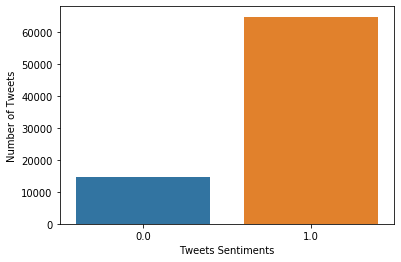

In [33]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns



Sentiment_count=df.groupby('label').count()


# plt.bar(Sentiment_count.index.values, Sentiment_count["text"])


sns.barplot(x=Sentiment_count.index.values, y= Sentiment_count["text"])

plt.xlabel("Tweets Sentiments")
plt.ylabel("Number of Tweets")
             
plt.show()

### Feature Generation using Bag of Words

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['text'])

### Split train and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['label'], test_size=0.3, random_state=1)

### Model Building and Evaluation

In [21]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8401730583441844


In [22]:
y_pred = clf.predict(X_test)
print((y_test, y_pred))

(50056     1.0
89731     1.0
81007     1.0
97749     1.0
56729     1.0
53464     1.0
47297     1.0
93018     1.0
98269     0.0
77147     1.0
67935     1.0
58542     0.0
89464     1.0
62133     1.0
94579     1.0
21657     1.0
2824      1.0
73297     1.0
61597     1.0
43442     1.0
61971     1.0
56501     0.0
70011     1.0
38746     0.0
19521     1.0
39193     1.0
31135     1.0
67343     1.0
50099     1.0
33071     0.0
         ... 
87525     1.0
46229     1.0
3930      1.0
66914     1.0
50736     1.0
25508     1.0
114001    1.0
87662     1.0
29714     1.0
82829     1.0
82030     1.0
22144     1.0
53757     1.0
47878     1.0
84381     1.0
57631     0.0
41699     1.0
94677     1.0
62140     1.0
103941    0.0
46018     1.0
98162     1.0
8853      0.0
28388     1.0
99107     0.0
16417     1.0
37107     0.0
31314     1.0
108617    1.0
67477     1.0
Name: label, Length: 23807, dtype: float64, array([1., 1., 1., ..., 1., 1., 1.]))


In [23]:
acc = metrics.accuracy_score(y_test, predicted)
pre = metrics.precision_score(y_test, predicted)
rec = metrics.recall_score(y_test, predicted)
f1 =metrics.f1_score(y_test, predicted)

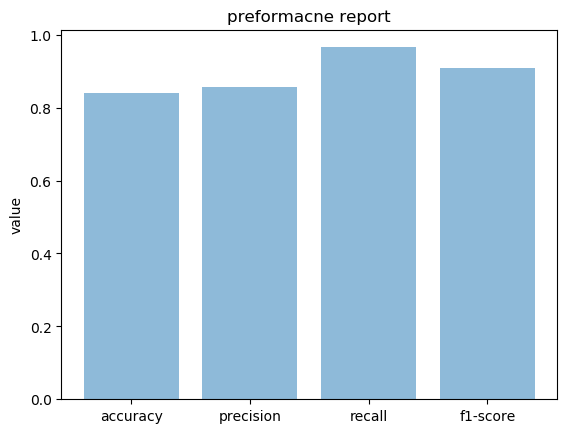

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance = [acc,pre,rec,f1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

### Feature Generation using TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['text'])

##### Split train and test set (TF-IDF)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['label'], test_size=0.3, random_state=123)

##### Model Building and Evaluation (TF-IDF)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8189608098458436


In [28]:
from sklearn.metrics import classification_report, accuracy_score

print("Train accuracy:", clf.score(X_train, y_train), ", Test accuracy:", clf.score(X_test, y_test))


Train accuracy: 0.8252142291351624 , Test accuracy: 0.8189608098458436


In [29]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.02      0.04      4382
         1.0       0.82      1.00      0.90     19425

    accuracy                           0.82     23807
   macro avg       0.80      0.51      0.47     23807
weighted avg       0.81      0.82      0.74     23807



In [30]:
acc = metrics.accuracy_score(y_test, predicted)
pre = metrics.precision_score(y_test, predicted)
rec = metrics.recall_score(y_test, predicted)
f1 =metrics.f1_score(y_test, predicted)

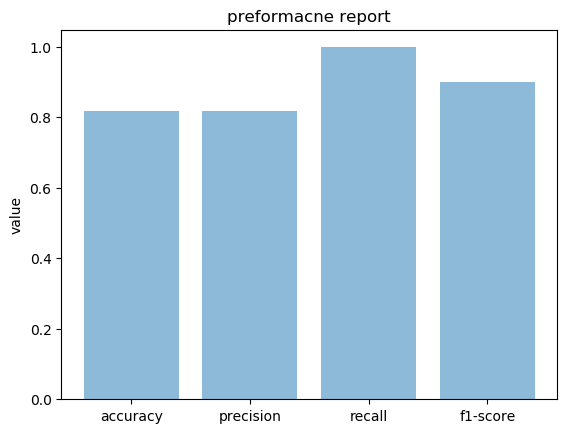

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance = [acc,pre,rec,f1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Conclusion

In this procedure, we conduct sentiment analysis and text classification using scikit-learn